# Dataset

In [ ]:
import os
import json
import requests
import zipfile
from tqdm import tqdm

# Updated download links
base_url = "https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/"
urls = {
    "Questions_Train": base_url + "v2_Questions_Train_mscoco.zip",
    "Questions_Val": base_url + "v2_Questions_Val_mscoco.zip",
    "Questions_Test": base_url + "v2_Questions_Test_mscoco.zip",
    "Annotations_Train": base_url + "v2_Annotations_Train_mscoco.zip",
    "Annotations_Val": base_url + "v2_Annotations_Val_mscoco.zip"
}

def download_file(url, target_path):
    response = requests.get(url, stream=True)
    total_size_in_bytes = int(response.headers.get('content-length', 0))
    block_size = 1024  # 1 Kibibyte
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)
    with open(target_path, 'wb') as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("ERROR: Something went wrong")

def unzip_file(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

def download_vqa():
    # Directories
    base_dir = "/content/cv2"
    zip_dir = os.path.join(base_dir, "zip")
    annotations_dir = os.path.join(base_dir, "annotations")

    # Create directories
    os.makedirs(zip_dir, exist_ok=True)
    os.makedirs(annotations_dir, exist_ok=True)

    # Download and unzip files
    for key, url in urls.items():
        zip_file_path = os.path.join(zip_dir, f"{key}.zip")
        if not os.path.exists(zip_file_path):
            print(f"Downloading {zip_file_path}...")
            download_file(url, zip_file_path)
        print(f"Extracting {zip_file_path}...")
        unzip_file(zip_file_path, annotations_dir)

# Run the function
download_vqa()

100%|██████████| 7.24M/7.24M [00:00<00:00, 13.0MiB/s]


Extracting /content/cv2/zip/Questions_Train.zip...


100%|██████████| 3.49M/3.49M [00:00<00:00, 7.96MiB/s]


Extracting /content/cv2/zip/Questions_Val.zip...


100%|██████████| 8.97M/8.97M [00:00<00:00, 15.8MiB/s]


Extracting /content/cv2/zip/Questions_Test.zip...


100%|██████████| 21.7M/21.7M [00:00<00:00, 23.3MiB/s]


Extracting /content/cv2/zip/Annotations_Train.zip...


100%|██████████| 10.5M/10.5M [00:00<00:00, 16.7MiB/s]


Extracting /content/cv2/zip/Annotations_Val.zip...


In [ ]:
import requests
import zipfile
import os

def download_and_unzip(url, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
    local_zip_file = os.path.join(target_folder, url.split('/')[-1])

    if not os.path.exists(local_zip_file):
        print(f"Downloading {local_zip_file}...")
        with requests.get(url, stream=True) as r:
            with open(local_zip_file, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
        print(f"Downloaded {local_zip_file}.")
    else:
        print(f"{local_zip_file} already exists.")

    print(f"Unzipping {local_zip_file}...")
    with zipfile.ZipFile(local_zip_file, 'r') as zip_ref:
        zip_ref.extractall(target_folder)
    print(f"Unzipped {local_zip_file}.")

# URLs of the datasets
train_url = "http://images.cocodataset.org/zips/train2014.zip"
val_url = "http://images.cocodataset.org/zips/val2014.zip"
test_url = "http://images.cocodataset.org/zips/test2015.zip"

# Target folder
base_folder = '/content/cv2/image'

# Download and unzip the datasets
download_and_unzip(train_url, os.path.join(base_folder, 'train2014/'))
download_and_unzip(val_url, os.path.join(base_folder, 'val2014/'))
download_and_unzip(test_url, os.path.join(base_folder, 'test2015/'))


Downloaded /content/cv2/image/train2014/train2014.zip.
Unzipping /content/cv2/image/train2014/train2014.zip...
Unzipped /content/cv2/image/train2014/train2014.zip.
Downloaded /content/cv2/image/val2014/val2014.zip.
Unzipping /content/cv2/image/val2014/val2014.zip...
Unzipped /content/cv2/image/val2014/val2014.zip.
Downloaded /content/cv2/image/test2015/test2015.zip.
Unzipping /content/cv2/image/test2015/test2015.zip...
Unzipped /content/cv2/image/test2015/test2015.zip.


In [ ]:
import json

def process_vqa():
    '''
    Put the VQA data into a single json file, where each item includes:
    [Question_id, Image_id, Question, Answers, Most Frequent Answer]
    Answers will include all provided answers and their confidence levels.
    '''

    train = []
    valid = []
    test = []
    test_dev = []
    imdir = '%s/COCO_%s_%012d.jpg'

    print('Loading annotations and questions...')
    train_anno = json.load(open('/content/cv2/annotations/v2_mscoco_train2014_annotations.json', 'r'))
    val_anno = json.load(open('/content/cv2/annotations/v2_mscoco_val2014_annotations.json', 'r'))
    train_ques = json.load(open('/content/cv2/annotations/v2_OpenEnded_mscoco_train2014_questions.json', 'r'))
    val_ques = json.load(open('/content/cv2/annotations/v2_OpenEnded_mscoco_val2014_questions.json', 'r'))
    test_ques = json.load(open('/content/cv2/annotations/v2_OpenEnded_mscoco_test2015_questions.json', 'r'))
    test_dev_ques = json.load(open('/content/cv2/annotations/v2_OpenEnded_mscoco_test-dev2015_questions.json', 'r'))

    # Process training and validation data
    for data_type, annotations, questions in [
        ('train', train_anno['annotations'], train_ques['questions']),
        ('val', val_anno['annotations'], val_ques['questions'])
    ]:
        result_list = train if data_type == 'train' else valid
        subtype = 'train2014' if data_type == 'train' else 'val2014'

        for anno, ques in zip(annotations, questions):
            image_id = anno['image_id']
            image_path = imdir % (subtype, subtype, image_id)
            answers_detail = [{'answer': a['answer'], 'confidence': a['answer_confidence'], 'answer_id': a['answer_id']} for a in anno['answers']]
            result_list.append({
                'question_id': ques['question_id'],
                'image_id': image_id,
                'image_path': image_path,
                'question': ques['question'],
                'answers': answers_detail,
                'correct_answer': anno['multiple_choice_answer']
            })

    # Process test and test-dev data (no answers available)
    for data_type, questions in [('test', test_ques['questions']), ('test-dev', test_dev_ques['questions'])]:
        result_list = test if data_type == 'test' else test_dev
        subtype = 'test2015'

        for ques in questions:
            image_id = ques['image_id']
            image_path = imdir % (subtype, subtype, image_id)
            result_list.append({
                'question_id': ques['question_id'],
                'image_id': image_id,
                'image_path': image_path,
                'question': ques['question']
            })

    # Log sample sizes
    print('Training sample: %d, Validation sample: %d, Test sample: %d, Test-dev sample: %d' %
          (len(train), len(valid), len(test), len(test_dev)))

    # Save to JSON
    json.dump(train, open('/content/cv2/vqa_raw_train.json', 'w'))
    json.dump(valid, open('/content/cv2/vqa_raw_valid.json', 'w'))
    json.dump(test, open('/content/cv2/vqa_raw_test.json', 'w'))
    json.dump(test_dev, open('/content/cv2/vqa_raw_test_dev.json', 'w'))

In [ ]:
# Call the function to process the data
process_vqa()

Loading annotations and questions...
Training sample: 443757, Validation sample: 214354, Test sample: 447793, Test-dev sample: 107394


In [ ]:
import json

def load_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def print_samples(data, num_samples=5):
    print(f"Showing {num_samples} samples from the data:\n")
    for i in range(min(num_samples, len(data))):  # Ensure we don't exceed data length
        print(data[i])
        print("\n")

# Load the data
train_data = load_data('/content/cv2/vqa_raw_train.json')
valid_data = load_data('/content/cv2/vqa_raw_valid.json')
test_data = load_data('/content/cv2/vqa_raw_test.json')
test_dev_data = load_data('/content/cv2/vqa_raw_test_dev.json')

# Print samples from each dataset
print("Train Data Samples:")
print_samples(train_data)

print("Validation Data Samples:")
print_samples(valid_data)

print("Test Data Samples:")
print_samples(test_data)

print("Test-Dev Data Samples:")
print_samples(test_dev_data)

Train Data Samples:
Showing 5 samples from the data:

{'question_id': 458752000, 'image_id': 458752, 'image_path': 'train2014/COCO_train2014_000000458752.jpg', 'question': 'What is this photo taken looking through?', 'answers': [{'answer': 'net', 'confidence': 'maybe', 'answer_id': 1}, {'answer': 'net', 'confidence': 'yes', 'answer_id': 2}, {'answer': 'net', 'confidence': 'yes', 'answer_id': 3}, {'answer': 'netting', 'confidence': 'yes', 'answer_id': 4}, {'answer': 'net', 'confidence': 'yes', 'answer_id': 5}, {'answer': 'net', 'confidence': 'yes', 'answer_id': 6}, {'answer': 'mesh', 'confidence': 'maybe', 'answer_id': 7}, {'answer': 'net', 'confidence': 'yes', 'answer_id': 8}, {'answer': 'net', 'confidence': 'yes', 'answer_id': 9}, {'answer': 'net', 'confidence': 'yes', 'answer_id': 10}], 'correct_answer': 'net'}


{'question_id': 458752001, 'image_id': 458752, 'image_path': 'train2014/COCO_train2014_000000458752.jpg', 'question': 'What position is this man playing?', 'answers': [{'ans

In [ ]:
train_data = load_data('/content/cv2/vqa_raw_train.json')
valid_data = load_data('/content/cv2/vqa_raw_valid.json')

from collections import Counter

# Extract all answers from the training data
all_answers = [item['correct_answer'] for item in train_data]

# Count how often each answer appears
answer_freq = Counter(all_answers)
print(len(answer_freq))
# Get the top 1000 most common answers
top_answers = [answer for answer, freq in answer_freq.most_common(2000)]

answer_to_index = {answer: idx for idx, answer in enumerate(top_answers)}

# Determine the total number of data points that have top answers
top_answer_counts = sum([freq for answer, freq in answer_freq.items() if answer in top_answers])

# Calculate the percentage coverage of the top answers
total_data_points = len(train_data)
percentage_coverage = (top_answer_counts / total_data_points) * 100

print(f"The top 2000 answers cover {percentage_coverage:.2f}% of the training dataset.")

# Filter the dataset to only include data points with top answers
filtered_train_data = [item for item in train_data if item['correct_answer'] in top_answers]
filtered_valid_data = [item for item in valid_data if item['correct_answer'] in top_answers]

# Print out the percentage of the dataset covered by filtered data
print(f"Training Data Retained: {(len(filtered_train_data) / total_data_points) * 100:.2f}%")

22531
The top 2000 answers cover 91.22% of the training dataset.
Training Data Retained: 91.22%


In [ ]:
def encode_answers(data, answer_to_index):
    encoded_data = []
    for item in data:
        answer = item['correct_answer'].lower()
        if answer in answer_to_index:
            encoded_item = item.copy()  # Copy the item to avoid changing the original data
            encoded_item['encoded_answer'] = answer_to_index[answer]
            encoded_data.append(encoded_item)
    return encoded_data

In [ ]:
train_data_encoded = encode_answers(filtered_train_data, answer_to_index)
valid_data_encoded = encode_answers(filtered_valid_data, answer_to_index)

In [ ]:
# Save the filtered data
with open('/content/cv2/filtered_train_data.json', 'w') as f:
    json.dump(train_data_encoded, f)

with open('/content/cv2/filtered_valid_data.json', 'w') as f:
    json.dump(valid_data_encoded, f)

# Feature Extraction

## ViLT

In [ ]:
import torch
from transformers import ViltProcessor, ViltModel
from PIL import Image
import json
import os
import numpy as np
from tqdm import tqdm

def load_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def process_and_save_features(data, base_image_path, save_path, batch_size=32):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()  # Set the model to evaluation mode
    model.to(device)
    # processor.to(device)

    if os.path.exists(save_path):
        features_list = list(np.load(save_path, allow_pickle=True))
        start_index = len(features_list)
        print(f"Resuming from index {start_index}")
    else:
        features_list = []
        start_index = 0

    for i in tqdm(range(start_index, len(data), batch_size), desc="Processing features"):
        batch_data = data[i:i+batch_size]
        batch_images = [Image.open(os.path.join(base_image_path, item['image_path'])).convert("RGB") for item in batch_data]
        batch_texts = [item['question'] for item in batch_data]

        # Prepare inputs
        inputs = processor(text=batch_texts, images=batch_images, return_tensors="pt", padding=True, truncation=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}  # Move inputs to GPU

        # Get the model outputs
        with torch.no_grad():
            outputs = model(**inputs)

        # Extract features from the last hidden state
        batch_features = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # Extract the CLS token features
        features_list.extend(batch_features)

        # Save the features periodically or at certain checkpoints
        if (i + batch_size) % (batch_size * 500) == 0 or i + batch_size >= len(data):
            np.save(save_path, np.array(features_list))

In [ ]:
processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-mlm")
model = ViltModel.from_pretrained("dandelin/vilt-b32-mlm")

In [ ]:
# Load datasets
train_data = load_data('/content/cv2/filtered_train_data.json')
valid_data = load_data('/content/cv2/filtered_valid_data.json')
test_data = load_data('/content/cv2/vqa_raw_test.json')
test_dev_data = load_data('/content/cv2/vqa_raw_test_dev.json')

In [ ]:
# Process and save features
process_and_save_features(train_data, '/content/cv2/image/train2014', '/content/cv2/train_features.npy')

Processing features: 100%|██████████| 12651/12651 [5:42:13<00:00,  1.62s/it]


In [ ]:
process_and_save_features(valid_data, '/content/cv2/image/val2014', '/content/cv2/valid_features.npy')


Processing features: 100%|██████████| 6069/6069 [2:15:53<00:00,  1.34s/it]


In [ ]:
process_and_save_features(test_data, '/content/cv2/image/test2015', '/content/cv2/test_features.npy')


Processing features: 100%|██████████| 13994/13994 [5:21:51<00:00,  1.38s/it]


In [ ]:
process_and_save_features(test_dev_data, '/content/cv2/image/test2015', '/content/cv2/test_dev_features.npy')

Processing features: 100%|██████████| 3357/3357 [1:18:55<00:00,  1.41s/it]


# Model

## MLP

## Model with Confidence

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np

class VQADataset(Dataset):
    def __init__(self, data, features):
        self.data = data
        self.features = features

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        features = torch.tensor(self.features[idx])

        label = item['encoded_answer']
        confidence_scores = {'yes': 1.0, 'maybe': 0.5, 'no': 0.1}
        weights = [confidence_scores[ans['confidence']] if ans['answer'] == item['correct_answer'] else confidence_scores[ans['confidence']] * 0.5 for ans in item['answers']]
        average_weight = sum(weights) / len(weights) if weights else 0


        return features.float(), label, torch.tensor(average_weight, dtype=torch.float32)

class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

def custom_loss(outputs, labels, weights):
    criterion = nn.CrossEntropyLoss(reduction='none')
    loss = criterion(outputs, labels)
    adjusted_loss = loss * weights.to(outputs.device)
    return adjusted_loss.mean()

def train_model(model, train_loader, device, epochs=50, lr=0.0001):
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for features, labels, weights in train_loader:
            features, labels, weights = features.to(device), labels.to(device), weights.to(device)
            optimizer.zero_grad()
            outputs = model(features)
            loss = custom_loss(outputs, labels, weights)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_loader)}')
    return model

In [ ]:
# Example Usage
import numpy as np
import json

def load_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Load the training data and features
train_data = load_data('/content/cv2/filtered_train_data.json')
train_features = np.load('/content/cv2/train_features.npy')

# Setup DataLoader
dataset = VQADataset(train_data, train_features)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Load and prepare your MLP model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPClassifier(input_dim=train_features.shape[1], hidden_dim=1024, output_dim=2000)


In [ ]:
# Train the model
model_with_confidence = train_model(model, dataloader, device)

save_path = '/content/mlp_model_with_confidence.pth'  # Define the path where the model should be saved

torch.save(model_with_confidence.state_dict(), save_path)
print(f'Model saved to {save_path}')

Epoch 1/50, Loss: 1.941305267783495
Epoch 2/50, Loss: 1.341279610618095
Epoch 3/50, Loss: 1.1965834094303773
Epoch 4/50, Loss: 1.1196019932993995
Epoch 5/50, Loss: 1.0655244990456538
Epoch 6/50, Loss: 1.0230373680242935
Epoch 7/50, Loss: 0.9904925843306035
Epoch 8/50, Loss: 0.9624332106237816
Epoch 9/50, Loss: 0.936518104156386
Epoch 10/50, Loss: 0.9144603646411207
Epoch 11/50, Loss: 0.895098102332085
Epoch 12/50, Loss: 0.8766917863902098
Epoch 13/50, Loss: 0.8602293443466852
Epoch 14/50, Loss: 0.8449441830086318
Epoch 15/50, Loss: 0.8303714669718496
Epoch 16/50, Loss: 0.816745320619043
Epoch 17/50, Loss: 0.8051030710416107
Epoch 18/50, Loss: 0.7941921747053068
Epoch 19/50, Loss: 0.7829376265527929
Epoch 20/50, Loss: 0.7737555906297887
Epoch 21/50, Loss: 0.7646444059602734
Epoch 22/50, Loss: 0.7552929295776258
Epoch 23/50, Loss: 0.7458012628301821
Epoch 24/50, Loss: 0.7368716220722944
Epoch 25/50, Loss: 0.730968398144571
Epoch 26/50, Loss: 0.7225417688226297
Epoch 27/50, Loss: 0.714422

## Model without Confidence

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
class VQADataset(Dataset):
    def __init__(self, data, features):
        self.data = data
        self.features = features

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        features = torch.tensor(self.features[idx])
        label = item['encoded_answer']

        return features.float(), torch.tensor(label, dtype=torch.long)


class MLPClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

def train_model(model, dataloader, device, epochs=50, lr=0.0001):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()

    for epoch in range(epochs):
        total_loss = 0
        for features, labels in dataloader:
            features, labels = features.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(dataloader)}')

    return model

In [ ]:
import numpy as np
import json

def load_data(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Load the training data and features
train_data = load_data('/content/cv2/filtered_train_data.json')
train_features = np.load('/content/cv2/train_features.npy')
# Setup DataLoader
dataset = VQADataset(train_data, train_features)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
# Load and prepare your MLP model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPClassifier(input_dim=train_features.shape[1], hidden_dim=1024, output_dim=2000)  # Adjust output_dim to match the number of classes

In [ ]:
# Train the model
model_without_confidence = train_model(model, dataloader, device)

Epoch 1/50, Loss: 2.718204206863832
Epoch 2/50, Loss: 1.9131834882491663
Epoch 3/50, Loss: 1.7099249605679832
Epoch 4/50, Loss: 1.6021231328316916
Epoch 5/50, Loss: 1.5250292835655104
Epoch 6/50, Loss: 1.4681489076122316
Epoch 7/50, Loss: 1.419394049387413
Epoch 8/50, Loss: 1.3794627614751012
Epoch 9/50, Loss: 1.3429306912974364
Epoch 10/50, Loss: 1.3108375537759203
Epoch 11/50, Loss: 1.2824605534077114
Epoch 12/50, Loss: 1.2583574898232963
Epoch 13/50, Loss: 1.2341208258887713
Epoch 14/50, Loss: 1.212538503880143
Epoch 15/50, Loss: 1.192175378569331
Epoch 16/50, Loss: 1.1704089578201946
Epoch 17/50, Loss: 1.154570093603728
Epoch 18/50, Loss: 1.1402090845249564
Epoch 19/50, Loss: 1.124234515589675
Epoch 20/50, Loss: 1.1079328319421635
Epoch 21/50, Loss: 1.0935366194400473
Epoch 22/50, Loss: 1.0820332599123441
Epoch 23/50, Loss: 1.0690220238408423
Epoch 24/50, Loss: 1.0576761343641041
Epoch 25/50, Loss: 1.0458423694233943
Epoch 26/50, Loss: 1.035625394863363
Epoch 27/50, Loss: 1.0246917

In [ ]:
save_path = '/content/mlp_model_without_confidence.pth'  # Define the path where the model should be saved

torch.save(model_without_confidence.state_dict(), save_path)
print(f'Model saved to {save_path}')

Model saved to /content/mlp_model_without_confidence.pth


# Evaluation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import json
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def load_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

train_data = load_json('/content/cv2/vqa_raw_train.json')
valid_data = load_json('/content/cv2/vqa_raw_valid.json')

# Extract all answers from the training data
all_answers = [item['correct_answer'] for item in train_data]

# Count how often each answer appears
answer_freq = Counter(all_answers)
print(len(answer_freq))
# Get the top 1000 most common answers
top_answers = [answer for answer, freq in answer_freq.most_common(2000)]

answer_to_index = {answer: idx for idx, answer in enumerate(top_answers)}
index_to_answer = {idx: answer for idx, answer in enumerate(top_answers)}

22531


In [ ]:
def load_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

import torch
import json
from tqdm import tqdm

def load_model(model_path, input_dim, hidden_dim, output_dim):
    model = MLPClassifier(input_dim, hidden_dim, output_dim)
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    model.eval()
    return model

def evaluate_model(model, features, index_to_answer, batch_size=32):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    predicted_indices = []
    features = torch.tensor(features).float()  # Convert features to a PyTorch tensor
    features = features.to(device)  # Move the entire tensor to GPU at once if possible

    with torch.no_grad():
        for i in tqdm(range(0, len(features), batch_size), desc="Evaluating model"):
            batch_features = features[i:i+batch_size]
            outputs = model(batch_features)
            _, predicted = torch.max(outputs, 1)
            predicted_indices.extend(predicted.cpu().numpy())  # Collect all predictions

    predicted_answers = [index_to_answer[idx] if idx in index_to_answer else "Unknown" for idx in predicted_indices]
    return predicted_answers

def create_results(test_data, predicted_answers):
    results = []
    for item, pred_answer in zip(test_data, predicted_answers):
        result = {
            "question_id": item['question_id'],
            "answer": pred_answer
        }
        results.append(result)
    return results

def save_results(results, save_path):
    with open(save_path, 'w') as f:
        json.dump(results, f, indent=4)






In [ ]:
# Load features and index_to_answer mapping
test_features = np.load('/content/cv2/test_features.npy')
test_dev_features = np.load('/content/cv2/test_dev_features.npy')

# Load test data for generating results
test_data = load_json('/content/cv2/vqa_raw_test.json')
test_dev_data = load_json('/content/cv2/vqa_raw_test_dev.json')

# Load models
model_with_conf = load_model('/content/mlp_model_with_confidence.pth', test_features.shape[1], 1024, 2000)
model_without_conf = load_model('/content/mlp_model_without_confidence.pth', test_features.shape[1], 1024, 2000)

# Evaluate models and create results
predicted_answers_with_conf_test = evaluate_model(model_with_conf, test_features, index_to_answer)
predicted_answers_with_conf_test_dev = evaluate_model(model_with_conf, test_dev_features, index_to_answer)
predicted_answers_without_conf_test = evaluate_model(model_without_conf, test_features, index_to_answer)
predicted_answers_without_conf_test_dev = evaluate_model(model_without_conf, test_dev_features, index_to_answer)

# Create and save results
results_with_conf_test = create_results(test_data, predicted_answers_with_conf_test)
results_with_conf_test_dev = create_results(test_dev_data, predicted_answers_with_conf_test_dev)
results_without_conf_test = create_results(test_data, predicted_answers_without_conf_test)
results_without_conf_test_dev = create_results(test_dev_data, predicted_answers_without_conf_test_dev)

save_results(results_with_conf_test, '/content/results_with_conf_test.json')
save_results(results_with_conf_test_dev, '/content/results_with_conf_test_dev.json')
save_results(results_without_conf_test, '/content/results_without_conf_test.json')
save_results(results_without_conf_test_dev, '/content/results_without_conf_test_dev.json')

Evaluating model: 100%|██████████| 3357/3357 [00:00<00:00, 3936.13it/s]


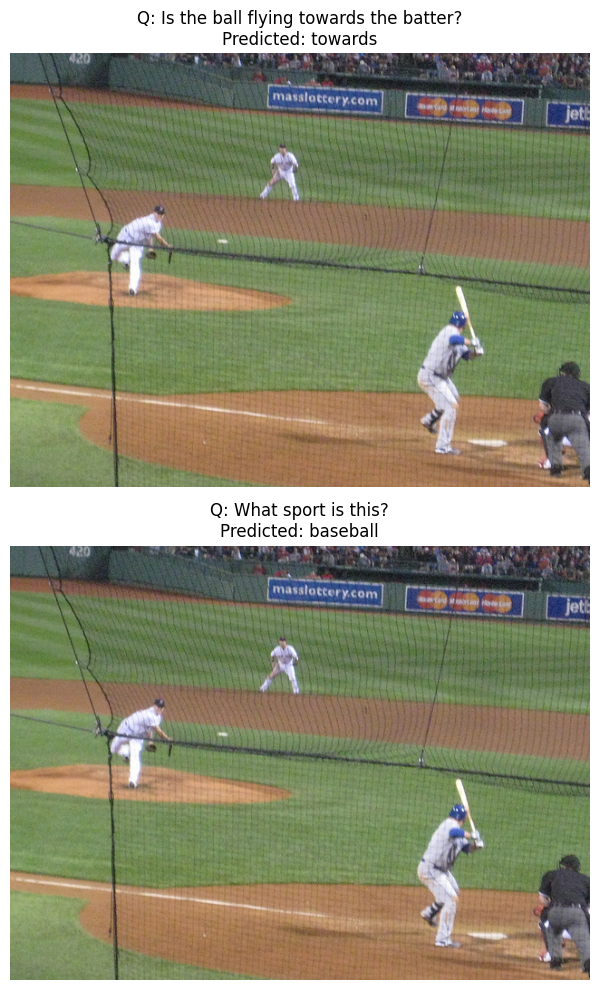

In [ ]:
def visualize_results(data, predicted_answers, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):  # Limit the number of images loaded and displayed
        item = data[i]
        img_path = '/content/cv2/image/test2015/' + item['image_path']
        img = Image.open(img_path)
        plt.subplot(num_samples, 1, i + 1)
        plt.imshow(img)
        # plt.title(f"Q: {item['question']}\nPredicted: {predicted_answers[i]}, Actual: {item['correct_answer']}")
        plt.title(f"Q: {item['question']}\nPredicted: {predicted_answers[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display a few sample results
visualize_results(test_data, predicted_answers_with_conf_test, num_samples=2)

# Plot

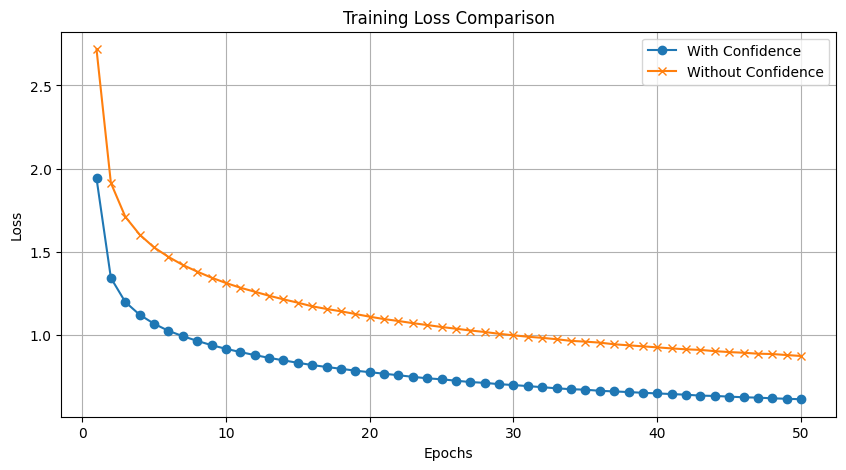

In [ ]:
import matplotlib.pyplot as plt

# Data for the models' training
model_with_confidence_loss = [
    1.9413, 1.3413, 1.1966, 1.1196, 1.0655, 1.0230, 0.9905, 0.9624, 0.9365,
    0.9145, 0.8951, 0.8767, 0.8602, 0.8449, 0.8304, 0.8167, 0.8051, 0.7942,
    0.7829, 0.7738, 0.7646, 0.7553, 0.7458, 0.7369, 0.7310, 0.7225, 0.7144,
    0.7095, 0.7017, 0.6963, 0.6900, 0.6835, 0.6767, 0.6713, 0.6684, 0.6617,
    0.6579, 0.6542, 0.6497, 0.6459, 0.6421, 0.6382, 0.6327, 0.6308, 0.6267,
    0.6227, 0.6205, 0.6165, 0.6136, 0.6110
]

model_without_confidence_loss = [
    2.7182, 1.9132, 1.7099, 1.6021, 1.5250, 1.4681, 1.4194, 1.3795, 1.3429,
    1.3108, 1.2825, 1.2584, 1.2341, 1.2125, 1.1922, 1.1704, 1.1546, 1.1402,
    1.1242, 1.1079, 1.0935, 1.0820, 1.0690, 1.0577, 1.0458, 1.0356, 1.0247,
    1.0158, 1.0049, 0.9957, 0.9873, 0.9805, 0.9722, 0.9623, 0.9577, 0.9517,
    0.9419, 0.9355, 0.9294, 0.9232, 0.9169, 0.9115, 0.9079, 0.9005, 0.8948,
    0.8909, 0.8851, 0.8831, 0.8770, 0.8713
]

# Plotting the data
epochs = list(range(1, 51))
plt.figure(figsize=(10, 5))

# Plot for the model with confidence
plt.plot(epochs, model_with_confidence_loss, label='With Confidence', marker='o')

# Plot for the model without confidence
plt.plot(epochs, model_without_confidence_loss, label='Without Confidence', marker='x')

plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


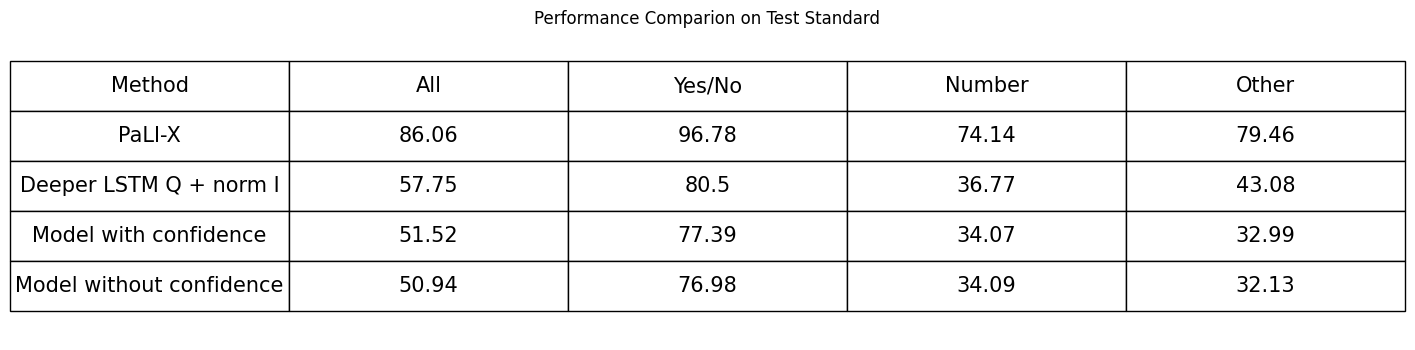

In [ ]:
# Data for the table
data = {
    'Method': [
        'PaLI-X',
        'Deeper LSTM Q + norm I',
        'Model with confidence',
        'Model without confidence'
    ],
    'All': [86.06, 57.75, 51.52, 50.94],
    'Yes/No': [96.78, 80.50, 77.39, 76.98],
    'Number': [74.14, 36.77, 34.07, 34.09],
    'Other': [79.46, 43.08, 32.99, 32.13]
}
comparison_df = pd.DataFrame(data).sort_values('All', ascending=False)

# Plot the DataFrame as a table
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')
plt.title('Performance Comparion on Test Standard')

# Create table and set the alignment of cells
table = ax.table(cellText=comparison_df.values,
                 colLabels=comparison_df.columns,
                 loc='center',
                 cellLoc='center')

# Set font size and scale the table
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1.5, 3)

plt.show()
